In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# import data from (https://archive.ics.uci.edu/ml/datasets/Online+Retail+II)
#data_ = data.to_csv('o_r.csv',index=False)
data = pd.read_csv("OnlineRetail.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [94]:
data.shape

(541909, 8)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Explanation

Berdasarkan informasi dari Online Retail Data Set, berikut informasi setiap atributnya:
- invoice_no = Merupakan nomor transaksi. Terdiri dari 6 digit angka yang bersifat unik setiap transaksi. Kemudian, jika nomor transaksi diawali huruf C maka artinya transaksi tersebut dicancel.
- stock_code = Merupakan kode produk yang terdiri dari 5 digit angka yang bersifat unik
- description = Nama produk.
- quantity = Jumlah per produk yang dibeli setiap transaksi.
- invoice_date = Waktu transaksi.
- unit_price = Harga setiap produk persetiap transaksi.
- customer_id = ID Customer yang terdiri dari 5 digit angka yang bersifat unik setiap customer.
- country = Negara asal customer ketika melakukan transaksi.

# Data Cleansing

In [96]:
# Berdarkan informasi variabel, jika InvoiceNo diawali denan huruf C, maka menandakan transaksi tersebut di-cancel. Mari kita cek:
# Cancelled Transaction
data[data['InvoiceNo'].str.contains("C")].count()

InvoiceNo      9288
StockCode      9288
Description    9288
Quantity       9288
InvoiceDate    9288
UnitPrice      9288
CustomerID     8905
Country        9288
dtype: int64

Terdapat InvoiceNo yang tidak valid diawali dengan huruf C yang menandakan transaksi tersebut di-cancel,mari kita bersihkan.

In [97]:
data = data[~(data['InvoiceNo'].str.contains("C"))]

In [98]:
# Berdasarkan informasi variabel, InvoiceNo yang valid terdiri dari 6 digit angka. Mari kita cek:
# Invalid Invoice
data[(data['InvoiceNo'].str.len() > 6)]
#InvoiceNo.count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


Terdapat 3 InvoiceNo yang tidak valid terdiri lebih dari 6 digit angka mari kita bersihkan

In [99]:
data = data[(data['InvoiceNo'].str.len() <= 6)]
data.InvoiceNo.count()

532618

In [100]:
# Apakah ada transaksi yang memiliki quantity <=0 ?
# Invalid Quantity
data[data['Quantity'] <= 0].count()

InvoiceNo      1336
StockCode      1336
Description     474
Quantity       1336
InvoiceDate    1336
UnitPrice      1336
CustomerID        0
Country        1336
dtype: int64

Terdapat Quantity yang tidak valid terdiri kurang dari 0 quantity, mari kita bersihkan.

In [101]:
data = data[data['Quantity'] > 0]
data.Quantity.count()

531282

In [102]:
# Apakah ada transaksi yang memiliki UnitPrice <=0 ?
# Invalid Unit Price
data[data['UnitPrice'] <= 0].count()

InvoiceNo      1179
StockCode      1179
Description     587
Quantity       1179
InvoiceDate    1179
UnitPrice      1179
CustomerID       40
Country        1179
dtype: int64

Terdapat UnitPrice yang tidak valid sebesar 1179 data dan terdiri kurang dari 0 UnitPrice, mari kita bersihkan.

In [103]:
data = data[data['UnitPrice'] > 0]
data.UnitPrice.count()

530103

In [104]:
# Apakah ada transaksi yang memiliki StockCode < 5 digit angka ?
# Invalid StockCode
data[(data['StockCode'].str.len() < 5)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911.0,EIRE
1814,536544,DOT,DOTCOM POSTAGE,1,12/1/2010 14:32,569.77,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.00,12518.0,Germany
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/2011 10:26,1714.17,NaN,United Kingdom
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526.0,Germany


In [105]:
data = data[(data['StockCode'].str.len() >= 5)]
data.StockCode.count()

527803

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131454
Country             0
dtype: int64
InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.905883
Country         0.000000
dtype: float64


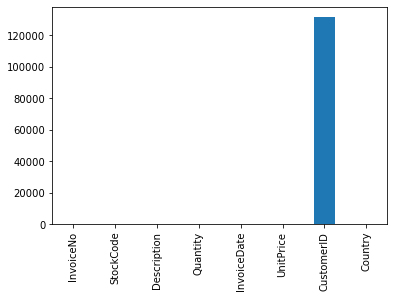

In [106]:
#Check Missing Value and Finding the missing percentage
data.isna().sum().plot(kind="bar");
missing_values_sum = data.isna().sum()
print(missing_values_sum)
missing_values_percent = data.isna().mean()*100
print(missing_values_percent)

In [107]:
# Drop missing value for content columns
data.dropna(subset=['CustomerID'],inplace=True)
data.shape

(396349, 8)

# Feature Engineering & Selection

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396349 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396349 non-null  object 
 1   StockCode    396349 non-null  object 
 2   Description  396349 non-null  object 
 3   Quantity     396349 non-null  int64  
 4   InvoiceDate  396349 non-null  object 
 5   UnitPrice    396349 non-null  float64
 6   CustomerID   396349 non-null  float64
 7   Country      396349 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.2+ MB


In [109]:
# Convert datatype
data[['CustomerID']] = data[['CustomerID']].astype('object')
data[['InvoiceDate']] = data[['InvoiceDate']].astype('datetime64')

In [110]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [111]:
# Feature Extraction
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [112]:
# Convert 'at' feature to date time then takeout hours and minutes.
data['date'] = data['InvoiceDate'].dt.strftime("%d-%m-%Y")
data.drop(columns=['InvoiceDate'], inplace=True)

In [113]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalRevenue,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,01-12-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,01-12-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,01-12-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,01-12-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,01-12-2010


In [114]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 3 numerical variables

The numerical variables are : ['Quantity', 'UnitPrice', 'TotalRevenue']


# Exploratory Data Analysis

<AxesSubplot:>

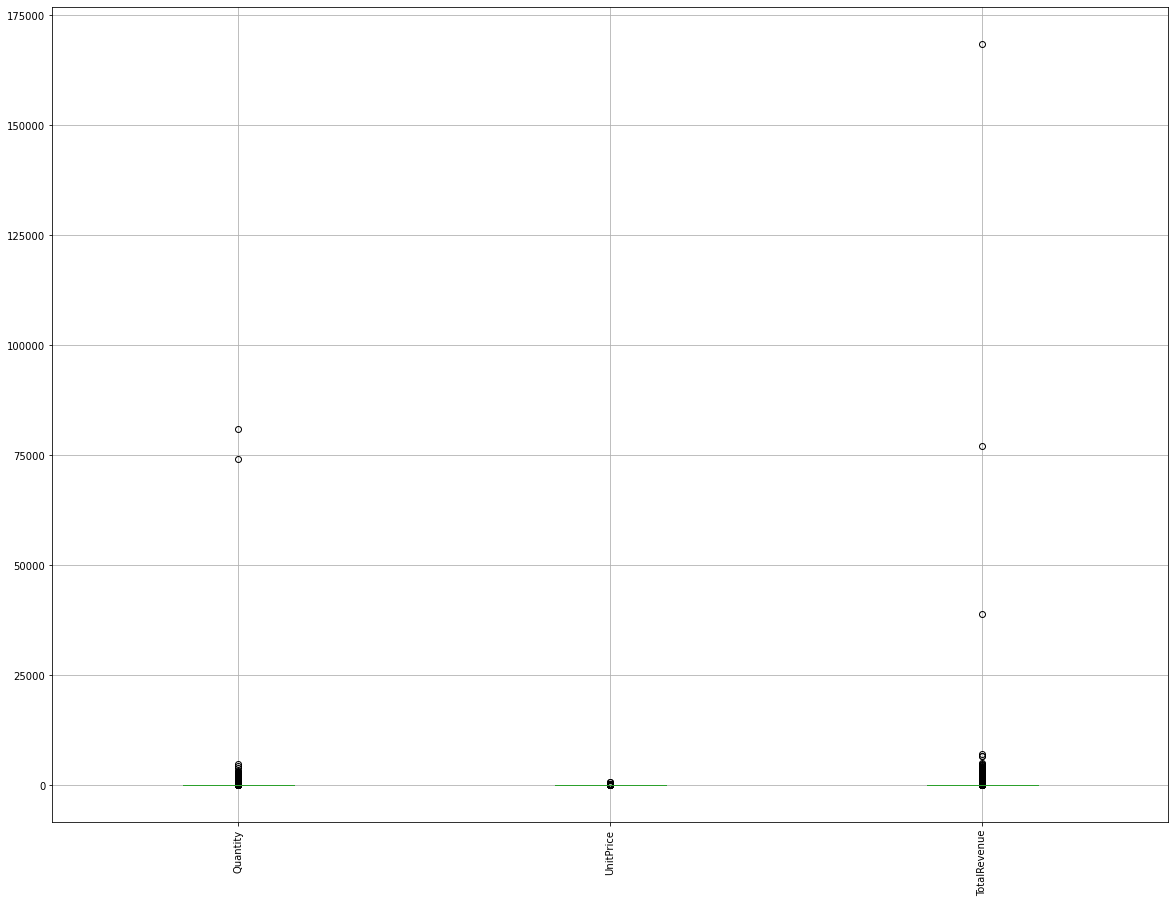

In [115]:
data.boxplot(rot=90, figsize=(20,15))

In [116]:
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalRevenue,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,01-12-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,01-12-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,01-12-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,01-12-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,01-12-2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,09-12-2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,09-12-2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,09-12-2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,09-12-2011


# RFM Preprocessing

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396349 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     396349 non-null  object 
 1   StockCode     396349 non-null  object 
 2   Description   396349 non-null  object 
 3   Quantity      396349 non-null  int64  
 4   UnitPrice     396349 non-null  float64
 5   CustomerID    396349 non-null  object 
 6   Country       396349 non-null  object 
 7   TotalRevenue  396349 non-null  float64
 8   date          396349 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 30.2+ MB


In [122]:
data['date'] = data['date'].astype('datetime64[ns]') # Ubah menjadi timeseries

In [123]:
data['date'] = data['date'].dt.strftime('%Y-%m-%d') # Sesuaikan dengan tanggal internasional tahun/bulan/tanggal

In [125]:
data['date'] = data['date'].astype('datetime64[ns]')

In [126]:
data.rename(columns={'TotalRevenue':'TotalSum'}, inplace=True)
data.rename(columns={'date':'InvoiceDate'}, inplace=True)

In [127]:
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalSum,InvoiceDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-01-12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,2011-09-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,2011-09-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,2011-09-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,2011-09-12


In [128]:
print('Min:{}; Max:{}'.format(min(data.InvoiceDate), max(data.InvoiceDate))) # Melihat tanggal transaksi pertama dan terakhir

Min:2010-01-12 00:00:00; Max:2011-12-10 00:00:00


In [129]:
import datetime as dt

In [130]:
snapshot_date = max(data.InvoiceDate) + dt.timedelta(days=1) # Membuat dugaan resensi (tanggal terakhir + 1 hari setelahnya)

In [131]:
datamart = data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

In [133]:
datamart

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346.0,327,1,77183.60
12347.0,41,182,4310.00
12348.0,77,27,1437.24
12349.0,20,72,1457.55
12350.0,312,16,294.40
...,...,...,...
18280.0,161,10,180.60
18281.0,5,7,80.82
18282.0,217,12,178.05


In [134]:
datamart.rename(columns={'InvoiceDate':'Recency', 
                        'InvoiceNo':'Frequency',
                        'TotalSum':'MonetaryValue'}, inplace=True) # Sesuaikan nama kedalam Recency, Frequency, Monetary

In [135]:
datamart

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,327,1,77183.60
12347.0,41,182,4310.00
12348.0,77,27,1437.24
12349.0,20,72,1457.55
12350.0,312,16,294.40
...,...,...,...
18280.0,161,10,180.60
18281.0,5,7,80.82
18282.0,217,12,178.05


In [148]:
r_labels = range(4, 0, -1) # Membuat qurtil dari recency
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)

In [149]:
f_labels = range(1, 5) # Membuat qurtil dari frequency
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
datamart = datamart.assign(F = f_quartiles.values)

In [150]:
m_labels = range(1, 5) # Membuat qurtil dari monetary
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
datamart = datamart.assign(M = m_quartiles.values)

In [151]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,327,1,77183.60,1,1,4
12347.0,41,182,4310.00,3,4,4
12348.0,77,27,1437.24,2,2,3
12349.0,20,72,1457.55,4,3,3
12350.0,312,16,294.40,1,1,1
...,...,...,...,...,...,...
18280.0,161,10,180.60,2,1,1
18281.0,5,7,80.82,4,1,1
18282.0,217,12,178.05,1,1,1


In [153]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M']) # Membuat fungsi untuk rfm segment dan score
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

In [173]:
datamart.reset_index(inplace=True) # Reset index

In [174]:
datamart[datamart['RFM_Segment']=='111'][:] # Eksplorasi hasil RFM

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
4,12350.0,312,16,294.40,1,1,1,111,3
6,12353.0,206,4,89.00,1,1,1,111,3
14,12361.0,289,9,174.90,1,1,1,111,3
19,12367.0,213,10,150.90,1,1,1,111,3
44,12402.0,325,10,195.60,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
4289,18224.0,265,10,158.95,1,1,1,111,3
4292,18227.0,189,5,93.75,1,1,1,111,3
4322,18269.0,486,7,168.60,1,1,1,111,3
4323,18270.0,268,11,283.15,1,1,1,111,3


In [180]:
datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(2) # Membuat rata-rata rfm berdasarkan rfm score

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3          291.20      7.93        154.27   366
4          197.77     14.16        230.42   381
5          168.88     21.41        357.17   538
6          118.50     28.67        642.69   472
7           99.78     39.34       1238.74   428
8           70.42     55.05       1035.41   462
9           58.45     79.22       1457.09   426
10          42.07    122.75       1966.22   437
11          26.91    190.27       4495.84   428
12          11.13    382.63       9341.95   397

In [181]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze' # Kelompokkan rfm score kedalam rentang secara umum 

In [183]:
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze           243.55     11.11        193.11   747
Gold              35.08    190.00       4213.82  1688
Silver           116.86     35.43        791.60  1900

# Identify RFM with K-means Clustering

C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


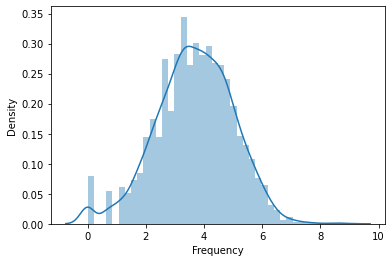

In [188]:
frequency_log = np.log(datamart['Frequency']) # Using logarithmic transformation(positive values only)
sns.distplot(frequency_log)
plt.show()

In [190]:
datamart

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,12346.0,327,1,77183.60,1,1,4,114,6,Silver
1,12347.0,41,182,4310.00,3,4,4,344,11,Gold
2,12348.0,77,27,1437.24,2,2,3,223,7,Silver
3,12349.0,20,72,1457.55,4,3,3,433,10,Gold
4,12350.0,312,16,294.40,1,1,1,111,3,Bronze
...,...,...,...,...,...,...,...,...,...,...
4330,18280.0,161,10,180.60,2,1,1,211,4,Bronze
4331,18281.0,5,7,80.82,4,1,1,411,6,Silver
4332,18282.0,217,12,178.05,1,1,1,111,3,Bronze
4333,18283.0,11,754,2088.93,4,4,4,444,12,Gold


C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

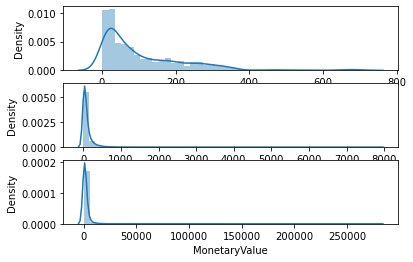

In [192]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(datamart['Recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(datamart['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(datamart['MonetaryValue'])
plt.show()

C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

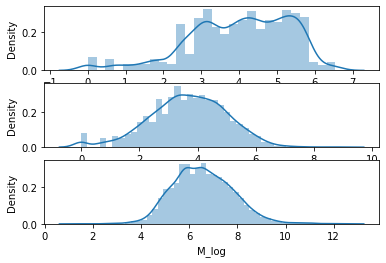

In [196]:
# Apply log transformation to each variable
datamart['R_log'] = np.log(datamart['Recency'])
datamart['F_log'] = np.log(datamart['Frequency'])
datamart['M_log'] = np.log(datamart['MonetaryValue'])

# Visualize
plt.subplot(3, 1, 1); sns.distplot(datamart['R_log'])
plt.subplot(3, 1, 2); sns.distplot(datamart['F_log'])
plt.subplot(3, 1, 3); sns.distplot(datamart['M_log'])
    x
# Show the plot
plt.show()

In [197]:
datamart

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,R_log,F_log,M_log
0,12346.0,327,1,77183.60,1,1,4,114,6,Silver,5.789960,0.000000,11.253942
1,12347.0,41,182,4310.00,3,4,4,344,11,Gold,3.713572,5.204007,8.368693
2,12348.0,77,27,1437.24,2,2,3,223,7,Silver,4.343805,3.295837,7.270480
3,12349.0,20,72,1457.55,4,3,3,433,10,Gold,2.995732,4.276666,7.284512
4,12350.0,312,16,294.40,1,1,1,111,3,Bronze,5.743003,2.772589,5.684939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,18280.0,161,10,180.60,2,1,1,211,4,Bronze,5.081404,2.302585,5.196285
4331,18281.0,5,7,80.82,4,1,1,411,6,Silver,1.609438,1.945910,4.392224
4332,18282.0,217,12,178.05,1,1,1,111,3,Bronze,5.379897,2.484907,5.182064
4333,18283.0,11,754,2088.93,4,4,4,444,12,Gold,2.397895,6.625392,7.644407


**Manual scaling**

In [198]:
data = datamart[['Recency','Frequency','MonetaryValue']]

In [203]:
# Center the data by subtracting average values from each entry
data_centered = data - data.mean()

# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4335.00,4335.00,4335.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.92,-0.40,-0.23
25%,-0.73,-0.33,-0.19
50%,-0.39,-0.22,-0.15
75%,0.49,0.04,-0.04
max,5.13,33.98,31.11


**Using sklearn**

In [208]:
from sklearn.preprocessing import StandardScaler
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Print summary statistics
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4335.00,4335.00,4335.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.92,-0.40,-0.23
25%,-0.73,-0.33,-0.19
50%,-0.39,-0.22,-0.15
75%,0.49,0.04,-0.04
max,5.13,33.98,31.12


In [211]:
datamart_rfm = data.copy()

C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

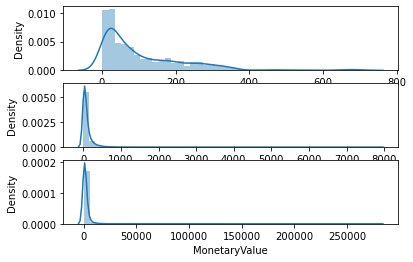

In [212]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

In [213]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

In [214]:
datamart_normalized

,Recency,Frequency,MonetaryValue
0,1.343946,-2.769334,3.716240
1,-0.217582,1.151795,1.423719
2,0.256379,-0.285978,0.551117
3,-0.757426,0.453060,0.562266
4,1.308633,-0.680237,-0.708700
...,...,...,...
4330,0.811084,-1.034376,-1.096968
4331,-1.799976,-1.303125,-1.735847
4332,1.035563,-0.897000,-1.108267
4333,-1.207024,2.222784,0.848226


C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

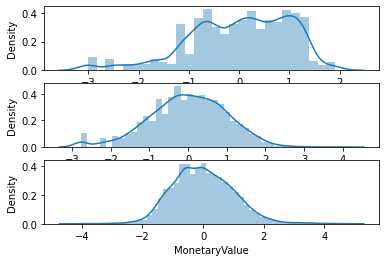

In [215]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()